Let's say:
- θ represents temperature
- ω represents windSpeed
- τ represents tailwindPercentage
- h represents headwindPercentage
- c represents crosswindPercentage

# $f(θ, ω, τ, h, c) = 0.4 \cdot \frac{1}{1 + e^{-(θ - 23)}} + 0.4 \cdot \frac{1}{1 + e^{-ω}} + 0.2 \cdot \frac{(τ - h - c + 100)}{200} $

In [9]:
import math

def compute_cycling_score(path_weather_impact):
    ideal_temperature = 23.0

    temperature_impact = 1 / (1 + math.exp(-(path_weather_impact['temperature'] - ideal_temperature)))

    ideal_wind_speed = 0.0

    wind_speed_impact = 1 / (1 + math.exp(-(path_weather_impact['wind_speed'] - ideal_wind_speed)))

    wind_impact = (path_weather_impact.get('tailwind_percentage', 0) - 
                   path_weather_impact.get('headwind_percentage', 0) - 
                   path_weather_impact.get('crosswind_percentage', 0))

    normalized_wind_impact = (wind_impact + 100) / 200  # normalize to 0-1 range

    temperature_weight = 0.4  # increase weight for temperature
    wind_speed_weight = 0.4  # increase weight for wind speed
    wind_impact_weight = 0.2  # reduce weight for wind impact

    score = (temperature_weight * temperature_impact + 
             wind_speed_weight * wind_speed_impact + 
             wind_impact_weight * normalized_wind_impact)

    return score

In [10]:
def should_i_cycle(path_weather_impact):
    if 'headwind_percentage' not in path_weather_impact or 'tailwind_percentage' not in path_weather_impact or 'crosswind_percentage' not in path_weather_impact:
        return "Data is incomplete"

    wind_speed = path_weather_impact['wind_speed']
    temperature = path_weather_impact['temperature']

    if wind_speed > 10:
        return "It's quite windy today. Cycling might be challenging."
    if temperature < 0:
        return "It's freezing outside. Cycling might be uncomfortable."
    if path_weather_impact['headwind_percentage'] > 50:
        return "There's a strong headwind today. Cycling could be difficult."
    if path_weather_impact['crosswind_percentage'] > 50:
        return "There's a strong crosswind today. It could make cycling unstable."
    if path_weather_impact['tailwind_percentage'] > 50:
        if temperature > 30:
            return "It's a warm day with a nice tailwind. Remember to stay hydrated while cycling."
        else:
            return "It's a good day to cycle with a supportive tailwind."
    if temperature > 30:
        return "It's quite hot today. If you decide to cycle, remember to stay hydrated."
    return "The weather seems good for cycling. Enjoy your ride!"

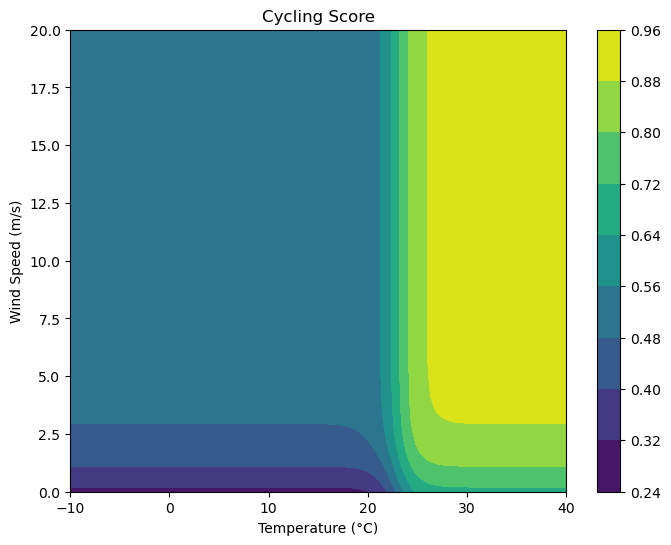

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create a range of temperature and wind speed values
temperatures = np.linspace(-10, 40, 100)  # temperatures from -10 to 40 degrees Celsius
wind_speeds = np.linspace(0, 20, 100)     # wind speeds from 0 to 20 m/s

# Create a 2D grid of temperature and wind speed values
temp_grid, wind_speed_grid = np.meshgrid(temperatures, wind_speeds)

# Compute the cycling score for each combination of temperature and wind speed
scores = np.zeros_like(temp_grid)
for i in range(temp_grid.shape[0]):
    for j in range(temp_grid.shape[1]):
        path_weather_impact = {
            'temperature': temp_grid[i, j],
            'wind_speed': wind_speed_grid[i, j],
            'tailwind_percentage': 20,  # keep wind impact constant
            'headwind_percentage': 10,
            'crosswind_percentage': 10,
        }
        scores[i, j] = compute_cycling_score(path_weather_impact)

# Create a contour plot of the cycling scores
plt.figure(figsize=(8, 6))
contour = plt.contourf(temp_grid, wind_speed_grid, scores, cmap='viridis')
plt.colorbar(contour)
plt.title('Cycling Score')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.show()

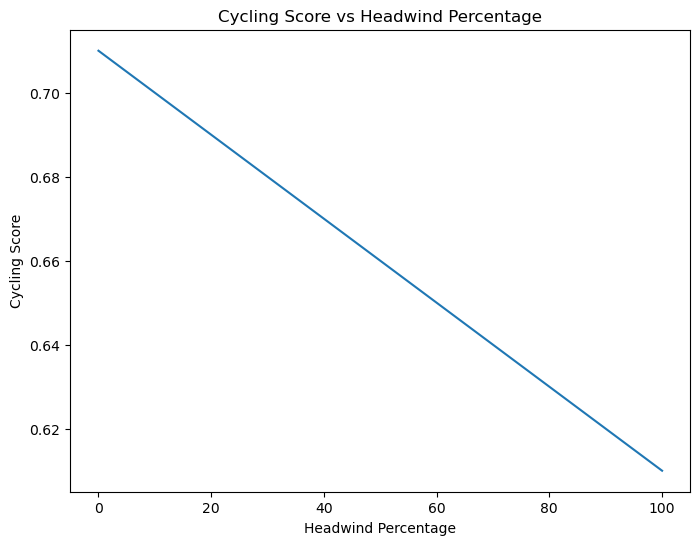

In [17]:
# Create a range of headwind percentage values
headwind_percentages = np.linspace(0, 100, 100)  # headwind percentages from 0 to 100

# Create an array to store the cycling scores for different headwind percentages
scores = np.zeros_like(headwind_percentages)

# Set the constant temperature and wind speed values
temperature = 23.0
wind_speed = 10.0

# Compute the cycling score for each headwind percentage
for i, headwind_percentage in enumerate(headwind_percentages):
    path_weather_impact = {
        'temperature': temperature,
        'wind_speed': wind_speed,
        'tailwind_percentage': 20,  # keep tailwind percentage constant
        'headwind_percentage': headwind_percentage,
        'crosswind_percentage': 10,
    }
    scores[i] = compute_cycling_score(path_weather_impact)

# Plot the cycling scores against headwind percentages
plt.figure(figsize=(8, 6))
plt.plot(headwind_percentages, scores)
plt.title('Cycling Score vs Headwind Percentage')
plt.xlabel('Headwind Percentage')
plt.ylabel('Cycling Score')
plt.show()

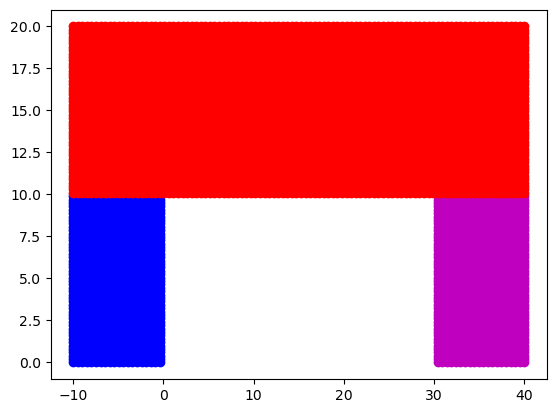

In [12]:
# Add markers to the graph for each condition in should_i_cycle()
for i in range(temp_grid.shape[0]):
    for j in range(temp_grid.shape[1]):
        path_weather_impact = {
            'temperature': temp_grid[i, j],
            'wind_speed': wind_speed_grid[i, j],
            'tailwind_percentage': 20,  # keep wind impact constant
            'headwind_percentage': 10,
            'crosswind_percentage': 10,
        }
        message = should_i_cycle(path_weather_impact)
        if "windy" in message:
            plt.plot(temp_grid[i, j], wind_speed_grid[i, j], 'ro')
        elif "freezing" in message:
            plt.plot(temp_grid[i, j], wind_speed_grid[i, j], 'bo')
        elif "headwind" in message or "crosswind" in message:
            plt.plot(temp_grid[i, j], wind_speed_grid[i, j], 'go')
        elif "tailwind" in message:
            plt.plot(temp_grid[i, j], wind_speed_grid[i, j], 'yo')
        elif "hot" in message:
            plt.plot(temp_grid[i, j], wind_speed_grid[i, j], 'mo')

plt.show()

In [18]:
import math

def compute_headwind_percentage(relative_wind_angle):
    if relative_wind_angle > 260 or (relative_wind_angle > 0 and relative_wind_angle < 90):
        theta_rad = math.radians(relative_wind_angle)
        return int((1 + math.cos(theta_rad)) / 2 * 100)
    return 0

def find_crosswind_percentage(relative_wind_angle):
    theta_rad = math.radians(relative_wind_angle)
    return int((1 - math.cos(2 * theta_rad)) / 2 * 100)

def find_tailwind_percentage(relative_wind_angle):
    if relative_wind_angle > 90 and relative_wind_angle < 260:
        theta_rad = math.radians(relative_wind_angle)
        return int((1 + math.cos(theta_rad)) / 2 * 100)
    return 0

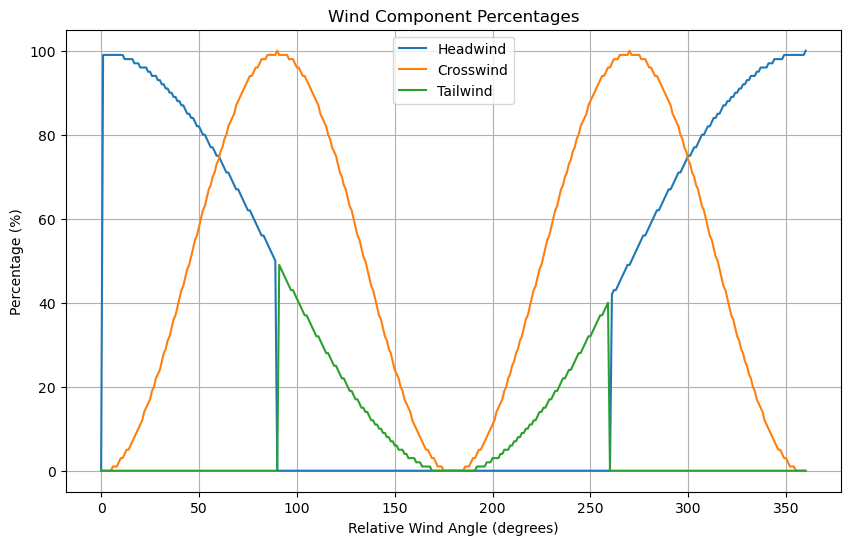

In [19]:
import matplotlib.pyplot as plt
import numpy as np

angles = np.arange(0, 361, 1)

headwind_percentages = [compute_headwind_percentage(angle) for angle in angles]
crosswind_percentages = [find_crosswind_percentage(angle) for angle in angles]
tailwind_percentages = [find_tailwind_percentage(angle) for angle in angles]

plt.figure(figsize=(10, 6))

plt.plot(angles, headwind_percentages, label='Headwind')
plt.plot(angles, crosswind_percentages, label='Crosswind')
plt.plot(angles, tailwind_percentages, label='Tailwind')

plt.xlabel('Relative Wind Angle (degrees)')
plt.ylabel('Percentage (%)')
plt.title('Wind Component Percentages')
plt.legend()
plt.grid(True)
plt.show()